In [2]:
%matplotlib inline

In [118]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [159]:
nn = 1000
x = np.linspace(-1, 1, nn)
t = 0.99

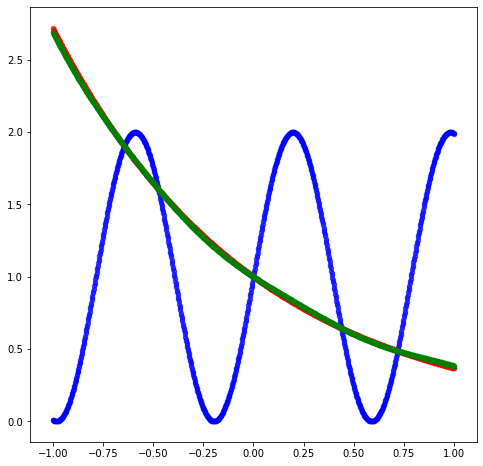

In [160]:
fig, ax = plt.subplots(1, 1,figsize=(8, 8))
ax.scatter(x, 1+ np.sin(8*x),alpha=0.6, s = 20, c = 'b')
ax.scatter(x,np.exp(-x), alpha=0.6, s = 20, c = 'r')
ax.scatter(x,(1-t)*(1+ np.sin(8*x))+ t*np.exp(-x), alpha=0.6, s = 20, c = 'g')

In [161]:
pdf1, pdf2 = 1+ np.sin(8*x), np.exp(-x)
pdf1 /= np.sum(pdf1)
pdf2 /= np.sum(pdf2)

(0, 0.0025)

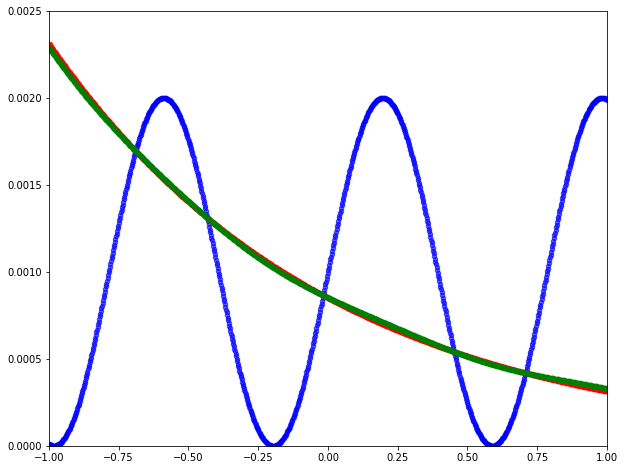

In [162]:
fig, ax = plt.subplots(1, 1,figsize=(10, 8))
ax.scatter(x, pdf1,alpha=0.6, s = 20, c = 'b')
ax.scatter(x,pdf2, alpha=0.6, s = 20, c = 'r')
ax.scatter(x,(1-t)*pdf1+ t*pdf2, alpha=0.6, s = 20, c = 'g')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 0.0025])

In [163]:
M = ot.dist(x.reshape((nn, 1)), x.reshape((nn, 1)))
Id = np.eye(nn)
G0 = ot.emd(pdf1, pdf2, M)
IpM =  ((1-t)/nn)*Id + t*G0

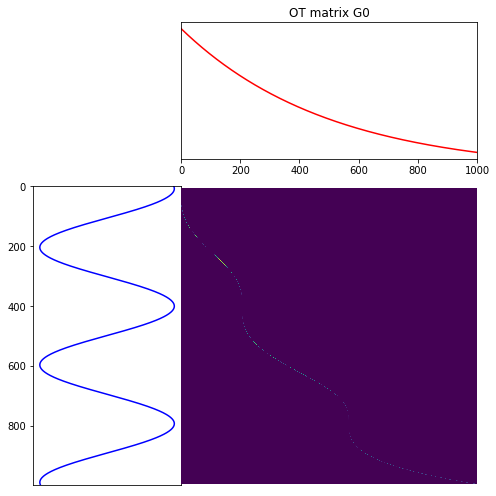

In [164]:
plt.figure( figsize=(7, 7))
ot.plot.plot1D_mat(pdf1, pdf2, G0, 'OT matrix G0')

In [165]:
tol = 10**(-9)
lista  = np.array([((1-t)*x[j] + t*x[i],  G0[i,j], int(i), int(j)) \
          for i in range (nn) for j in range(nn) if  G0[i,j]> tol])
lista = lista[lista[:,0].argsort()]
zl = [z[0] for z in lista]
cl = [z[1] for z in lista]
zlshf = np.roll(zl, -1)
diff = -np.array(zl) + zlshf

In [142]:
zl


[-1.0,
 -0.9983983983983984,
 -0.9967967967967968,
 -0.9951951951951952,
 -0.9935935935935936,
 -0.991991991991992,
 -0.9903903903903905,
 -0.9887887887887887,
 -0.9871871871871872,
 -0.9855855855855855,
 -0.983983983983984,
 -0.9823823823823824,
 -0.9807807807807808,
 -0.9791791791791792,
 -0.9775775775775776,
 -0.975975975975976,
 -0.9743743743743745,
 -0.9727727727727727,
 -0.9711711711711712,
 -0.9695695695695695,
 -0.967967967967968,
 -0.9663663663663664,
 -0.9647647647647648,
 -0.9631631631631632,
 -0.9615615615615616,
 -0.95995995995996,
 -0.9583583583583584,
 -0.9567567567567568,
 -0.9551551551551551,
 -0.9535535535535535,
 -0.9519519519519519,
 -0.9503503503503503,
 -0.9487487487487487,
 -0.9471471471471472,
 -0.9455455455455455,
 -0.943943943943944,
 -0.9423423423423423,
 -0.9407407407407408,
 -0.939139139139139,
 -0.9375375375375375,
 -0.9359359359359359,
 -0.9343343343343343,
 -0.9327327327327327,
 -0.9311311311311311,
 -0.9295295295295295,
 -0.927927927927928,
 -0.92632632

In [143]:
np.histogram(diff, bins = 4*nn)

(array([  1,   0,   0, ..., 999,   0, 999]),
 array([-2.00000000e+00, -1.99949960e+00, -1.99899920e+00, ...,
         6.00800801e-04,  1.10120120e-03,  1.60160160e-03]))

(-1, 1)

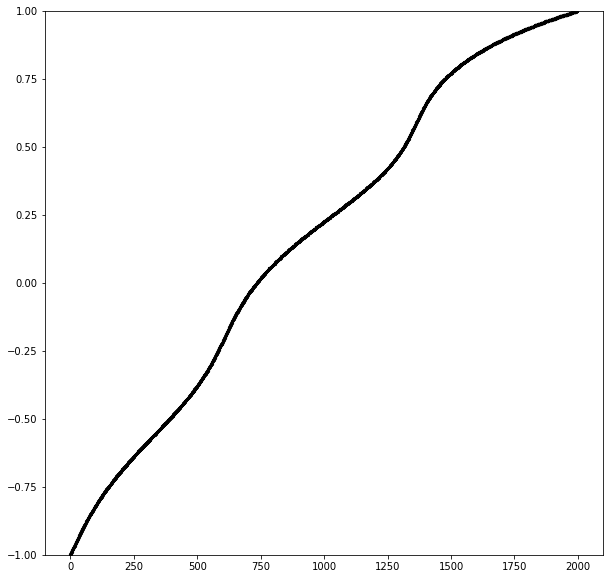

In [166]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter( range(len(zl)), zl,alpha=1, s = 5, c = 'k')

#ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

(0.0, 0.0022)

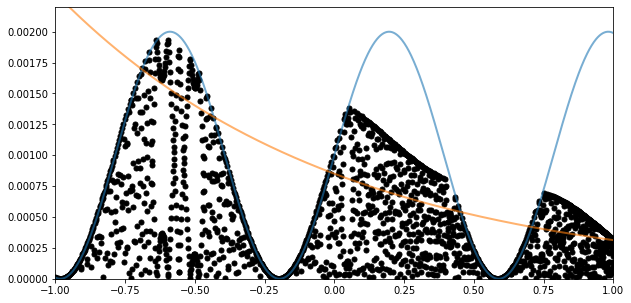

In [170]:
fig, ax = plt.subplots(1, 1,figsize=(10, 5))
ax.scatter( zl, cl,alpha=1, s = 25, c = 'k')
ax.plot(x, pdf1, lw=2, alpha=0.6)
ax.plot(x, pdf2,   lw = 2, alpha=0.6)
ax.set_xlim([-1, 1])
ax.set_ylim([0.0, 0.0022])

In [169]:
np.histogram(zl, bins = 3*nn)

(array([1, 0, 1, ..., 0, 0, 7]),
 array([-1.        , -0.99933333, -0.99866667, ...,  0.99866667,
         0.99933333,  1.        ]))

In [35]:
len(zl)

39

In [8]:
tol = 10**(-9)
lista  = np.array([((1-t)*x[i] + t*x[j],  G0[i,j], int(i), int(j)) \
          for i in range (nn) for j in range(nn) if  G0[i,j]> tol])
lista = lista[lista[:,0].argsort()]
zh = np.array([x[0]]+[(1-t)*x[i] + t*x[i+1] for i in range (nn-1) ])
ipm = [z[1] for z in lista]
ipv = [z[0] for z in lista]
ls = lista[0:10]
ls

array([[-1.00000000e+00,  5.32087669e-04,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  1.16321392e-02,  1.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  4.83700805e-02,  2.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  5.32369550e-02,  3.00000000e+00,
         0.00000000e+00],
       [-8.94736842e-01,  3.29601996e-02,  3.00000000e+00,
         1.00000000e+00],
       [-8.94736842e-01,  6.94439059e-02,  4.00000000e+00,
         1.00000000e+00],
       [-7.89473684e-01,  3.03929264e-02,  4.00000000e+00,
         2.00000000e+00],
       [-7.89473684e-01,  6.17797418e-02,  5.00000000e+00,
         2.00000000e+00],
       [-6.84210526e-01,  1.48981654e-02,  9.00000000e+00,
         3.00000000e+00],
       [-6.84210526e-01,  2.34743348e-03,  8.00000000e+00,
         3.00000000e+00]])

In [10]:
def mass_counter(k):
    return  np.sum(np.array([ z[1]  for z in lista if x[k]<z[0]<x[k+1]]) )

In [11]:
 (mass_counter(0), mass_counter(1), mass_counter(2), mass_counter(3) )
 

(0.0, 0.0, 0.0, 0.0)

In [12]:
np.sum(mc0, axis = 0)

NameError: name 'mc0' is not defined

In [13]:
mc1 = mass_counter(1)

In [ ]:
mass_counter(2)

In [ ]:
mass_interp = np.array([G0[0,0]] + [mass_counter(k) for k in range(nn-1)] )
len(mass_interp)

In [ ]:
np.sum(mass_interp)

(0.0, 0.002)

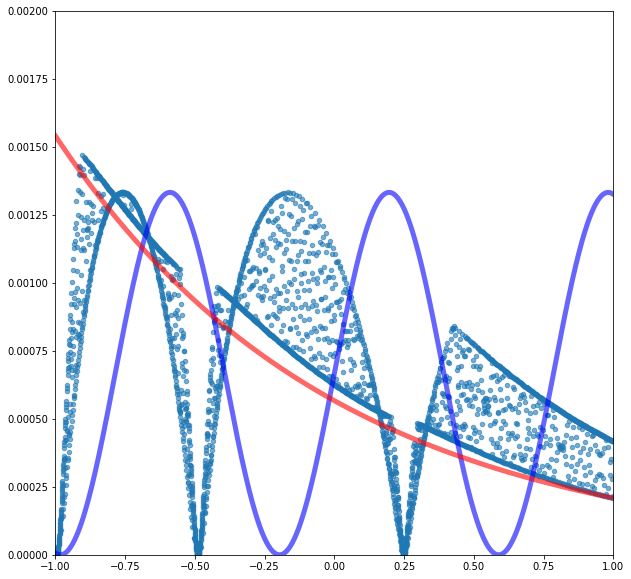

In [74]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter( zl, cl+cls,alpha=0.6, s = 20,)
ax.plot(x, pdf1, 'b-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, pdf2, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set_xlim([-1, 1])
ax.set_ylim([0.0, 0.002])
#ax.plot(x,(1-t)*pdf1+ t*pdf2, 'g-', lw=2, alpha=0.6, label='norm pdf')

In [ ]:
np.sum(weigh)

In [8]:
k = 10
tol = 10**(-10)
np.sum([pdf1[j] for j in range(nn) if IpM[k,j] > tol] )- pdf2[k]

0.1403035143258407

In [ ]:
z = np.sort(z_list)
datos = [z[j+1]-z[j] for j in range(len(z)-1)]
np.histogram(datos)

In [ ]:
datos

In [ ]:
Id = np.identity(nn)
t =0.05
R = ((1-t)/nn)*Id+ t*G0

In [ ]:
pdft = np.sum(R, axis = 0)

In [ ]:
plt.figure( figsize=(5, 5))
ot.plot.plot1D_mat(pdf1, pdft, R, 'OT matrix G0')

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(5, 5))
ax.plot(x, pdf1, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, pdft, 'b-', lw=5, alpha=0.6, label='norm pdf')
#plt.show()

In [ ]:
a, b  = norm.ppf(0.001,loc=0, scale=sdv2), norm.ppf(0.999,loc=0, scale=sdv2)
x = np.linspace(a, b, nn)
pdf1 = norm.pdf(x, loc=mu1, scale=sdv1) 
pdf2 = norm.pdf(x, loc=mu2, scale=sdv2) 
pdf1 /= np.sum(pdf1)
pdf2 /= np.sum(pdf2)

In [ ]:
M = ot.dist(x.reshape((nn, 1)), x.reshape((nn, 1)))

In [ ]:
G0 = ot.emd(pdf1, pdf2, M)

plt.figure( figsize=(5, 5))
ot.plot.plot1D_mat(pdf1, pdf2, G0, 'OT matrix G0')

In [ ]:
lista = [[i,j] for i in range(nn) for j in range(nn) if G0[i,j]>0.0001]
a = lista[3] 
np.sum([ G0[a[0], a[1]] for a in lista ] )

In [ ]:
lista

In [ ]:
 G0[3,1] -pdf2[1]

In [ ]:
W=ot.emd2(pdf1,pdf2,M)
np.sqrt(W)

In [ ]:
x = np.linalg.solve(G0, pdf1)


In [ ]:
pdf1

In [ ]:
np.sum(G0, axis = 1)